<a href="https://colab.research.google.com/github/Tariquzzaman-faisal/hatespeech/blob/main/analyse_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to google drive

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [5]:
import pandas as pd
csv_path = "/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/bengali_hate_v2.0.csv"
data = pd.read_csv(csv_path)

In [6]:
# Check the first few rows of the dataset
print(data.head())

                                                text         label  target
0  বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...      Personal       0
1  এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...     Political       1
2  পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...  Geopolitical       3
3  ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...  Geopolitical       3
4            খানকির পুলা মালায়নদের মেরে সাফা করে ফেল      Personal       0


In [7]:
# Check the distribution of classes
print(data['label'].value_counts())

Personal        2189
Geopolitical    1738
Religious        957
Political        814
Name: label, dtype: int64


In [9]:
!pip install pandas matplotlib

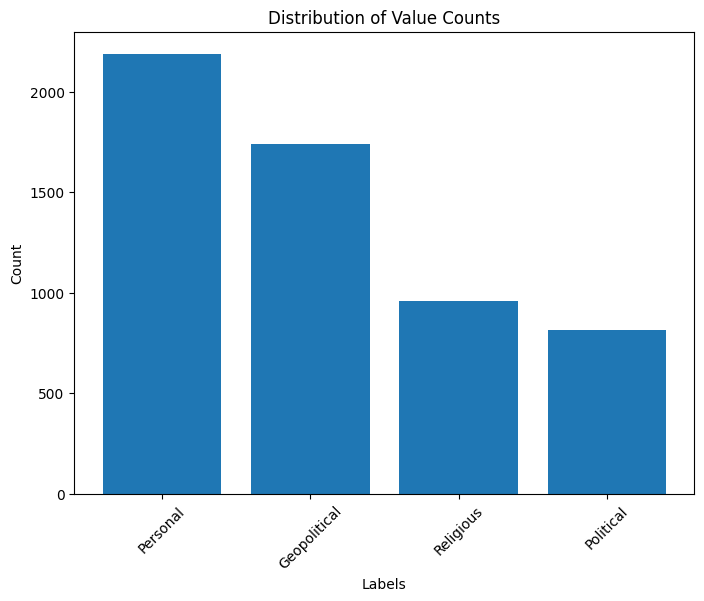

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the distribution of classes
value_counts = data['label'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Value Counts')
plt.xticks(rotation=45)
plt.show()

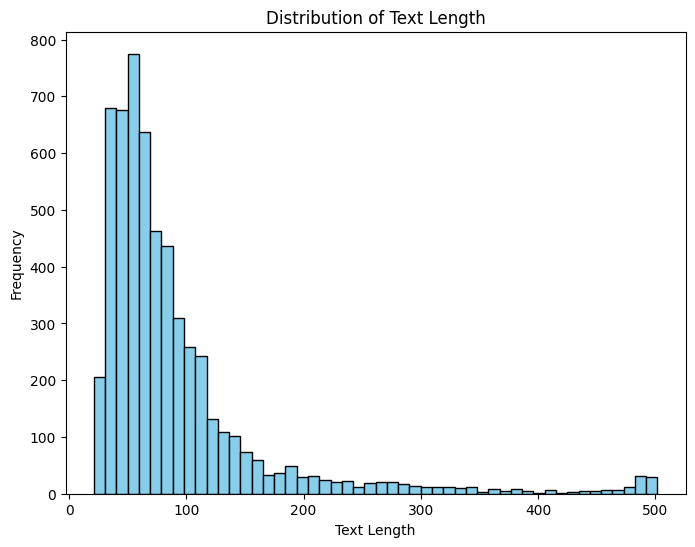

In [12]:
# Calculate the length of each text entry
data['text_length'] = data['text'].apply(len)

# Plot the distribution using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

In [13]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00


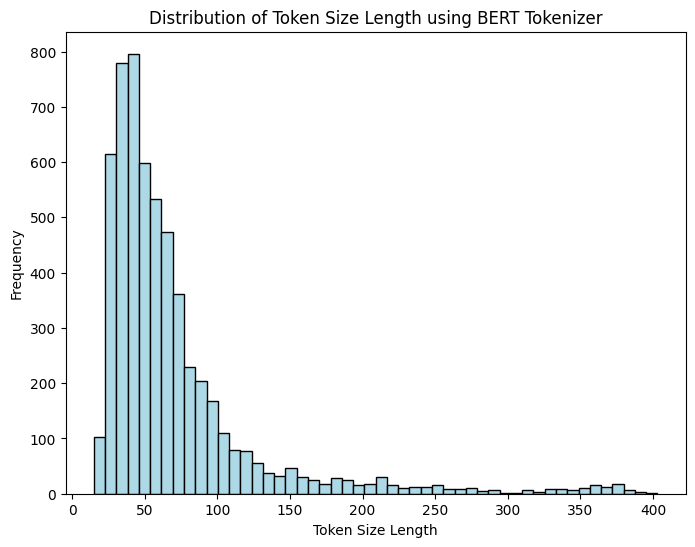

In [15]:
from transformers import AutoModelForPreTraining, AutoTokenizer
model_name = 'csebuetnlp/banglabert'
# bertModel = AutoModelForPreTraining.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text and calculate the token size length for each entry
data['tokenized_text'] = data['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
data['token_size'] = data['tokenized_text'].apply(len)

# Plot the distribution using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['token_size'], bins=50, color='lightblue', edgecolor='black')
plt.xlabel('Token Size Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Size Length using BERT Tokenizer')
plt.show()